<a href="https://colab.research.google.com/github/Ryan98-sawe/quant-portfolio/blob/main/Exam_results_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [4]:
# load data
df= pd.read_csv("highschool_exam_results.csv")
df.head()

,Student_ID,Name,Gender,Age,School,Math,English,Kiswahili,History,Biology,Chemistry,Physics,Total,Average,Grade,Passed
0,1,Student_01,Male,14,Sunrise School,81,44,90,50,53,32,51,401,57.29,D,Yes
1,2,Student_02,Female,15,Greenhill High,82,31,59,67,31,93,89,452,64.57,C,Yes
2,3,Student_03,Male,14,Sunrise School,50,62,87,51,78,88,71,487,69.57,C,Yes
3,4,Student_04,Male,18,Riverside Academy,89,44,91,91,76,91,80,562,80.29,A,Yes
4,5,Student_05,Male,14,Greenhill High,84,93,32,80,36,50,68,443,63.29,C,Yes


In [7]:
print(df.head())
print(df.info())
print(df.describe())


   Student_ID        Name  Gender  Age             School  Math  English  \
0           1  Student_01    Male   14     Sunrise School    81       44   
1           2  Student_02  Female   15     Greenhill High    82       31   
2           3  Student_03    Male   14     Sunrise School    50       62   
3           4  Student_04    Male   18  Riverside Academy    89       44   
4           5  Student_05    Male   14     Greenhill High    84       93   

   Kiswahili  History  Biology  Chemistry  Physics  Total  Average Grade  \
0         90       50       53         32       51    401    57.29     D   
1         59       67       31         93       89    452    64.57     C   
2         87       51       78         88       71    487    69.57     C   
3         91       91       76         91       80    562    80.29     A   
4         32       80       36         50       68    443    63.29     C   

  Passed  
0    Yes  
1    Yes  
2    Yes  
3    Yes  
4    Yes  
<class 'pandas.core.

In [12]:
# Finding Missing Values
print(df.isnull().sum())

Student_ID    0
Name          0
Gender        0
Age           0
School        0
Math          0
English       0
Kiswahili     0
History       0
Biology       0
Chemistry     0
Physics       0
Total         0
Average       0
Grade         0
Passed        0
dtype: int64


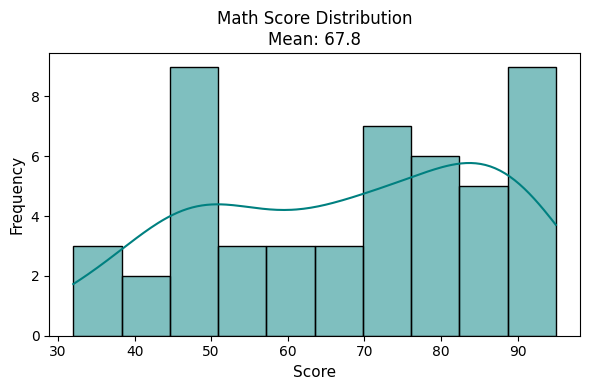

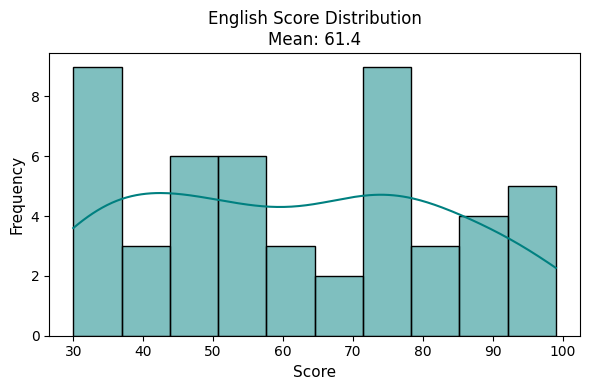

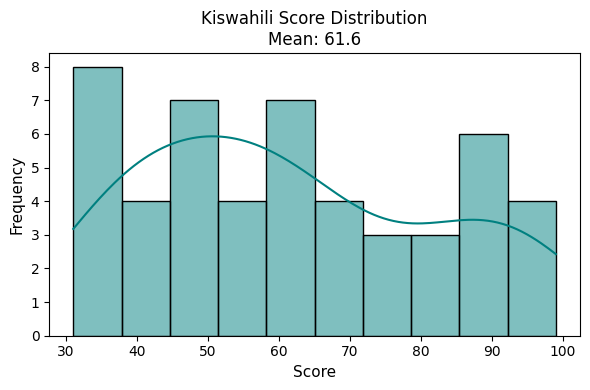

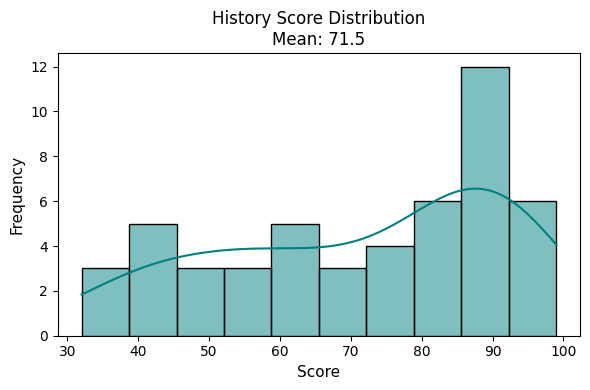

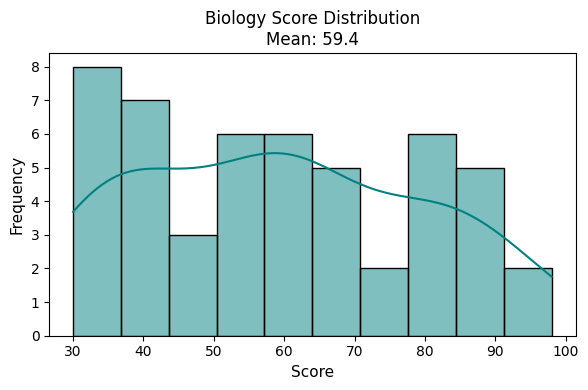

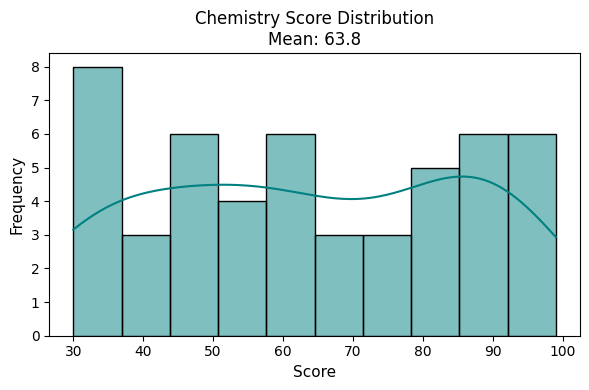

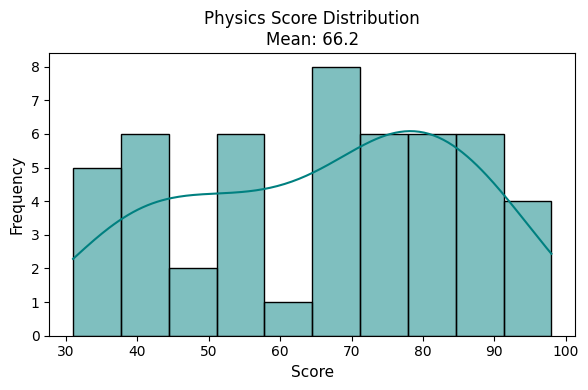

Subject Stats:
Math: Mean = 67.8, Std = 18.7
English: Mean = 61.4, Std = 21.8
Kiswahili: Mean = 61.6, Std = 20.7
History: Mean = 71.5, Std = 20.1
Biology: Mean = 59.4, Std = 20.0
Chemistry: Mean = 63.8, Std = 22.2
Physics: Mean = 66.2, Std = 19.2


In [49]:
# Plot score distributions
for subj in subjects:
    plt.figure(figsize=(6, 4))  # Compact size
    sns.histplot(data[subj], kde=True, color='teal', bins=10)  # Custom color, fewer bins
    plt.title(f'{subj} Score Distribution\nMean: {data[subj].mean():.1f}', fontsize=12)
    plt.xlabel('Score', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.tight_layout()
    plt.savefig(f'{subj.lower()}_dist.png', dpi=100)  # Save for portfolio
    plt.show()

# Quick stats
print("Subject Stats:")
for subj in subjects:
    print(f"{subj}: Mean = {data[subj].mean():.1f}, Std = {data[subj].std():.1f}")

<ipython-input-51-dca8c566ad8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Average', data=data, errorbar='se', palette='Blues')  # Add error bars


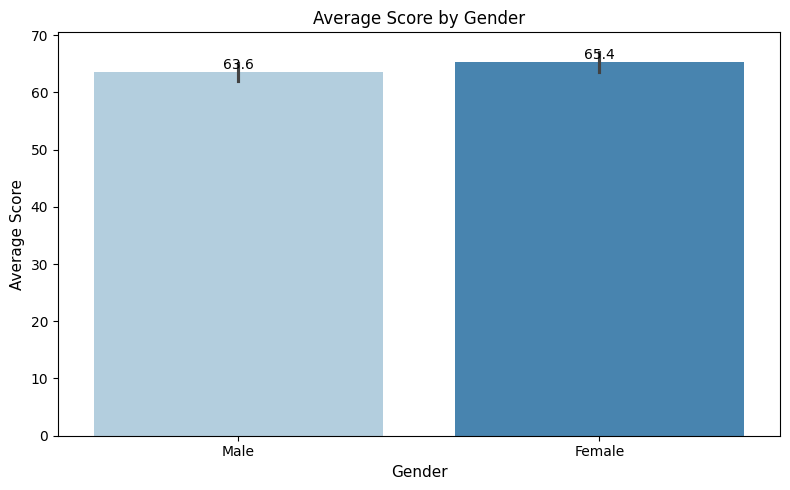

<ipython-input-51-dca8c566ad8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Average', data=data, errorbar='se', palette='Blues')  # Add error bars


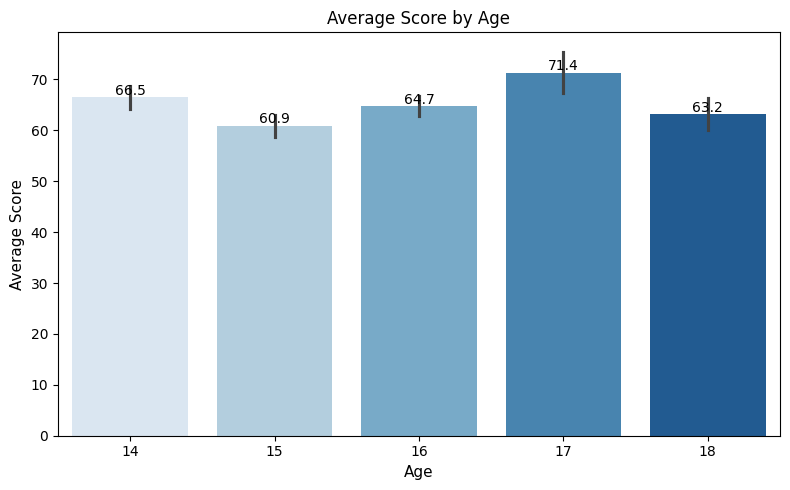

<ipython-input-51-dca8c566ad8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=col, y='Average', data=data, errorbar='se', palette='Blues')  # Add error bars


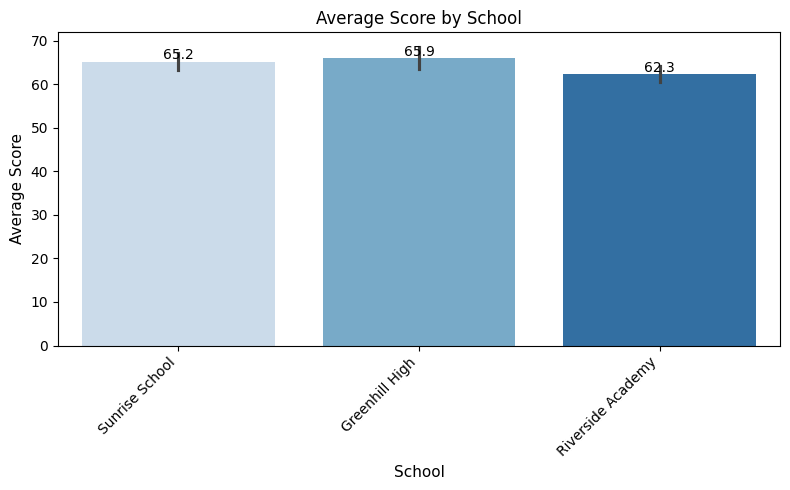

Average Scores by Group:
Gender:
         mean  std
Gender           
Female  65.4  9.0
Male    63.6  7.8
Age:
      mean   std
Age            
14   66.5   8.4
15   60.9   7.4
16   64.7   5.9
17   71.4   8.2
18   63.2  10.3
School:
                    mean  std
School                      
Greenhill High     65.9  9.9
Riverside Academy  62.3  7.2
Sunrise School     65.2  8.2


In [51]:
# Plot average scores by group
for col in group_cols:
    plt.figure(figsize=(8, 5))  # Keep compact size
    ax = sns.barplot(x=col, y='Average', data=data, errorbar='se', palette='Blues')  # Add error bars
    plt.title(f'Average Score by {col}', fontsize=12)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Average Score', fontsize=11)

    # Add mean values on bars
    for i, bar in enumerate(ax.patches):
        ax.text(i, bar.get_height() + 0.5, f'{bar.get_height():.1f}', ha='center', fontsize=10)

    if col == 'School':  # Rotate long labels
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig(f'avg_score_by_{col.lower()}.png', dpi=100)  # Save for portfolio
    plt.show()

# Quick summary
print("Average Scores by Group:")
for col in group_cols:
    print(f"{col}:\n", data.groupby(col)['Average'].agg(['mean', 'std']).round(1))

<ipython-input-18-2d8c3888f0f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Average', data=data, errorbar='se', palette=palettes[col])


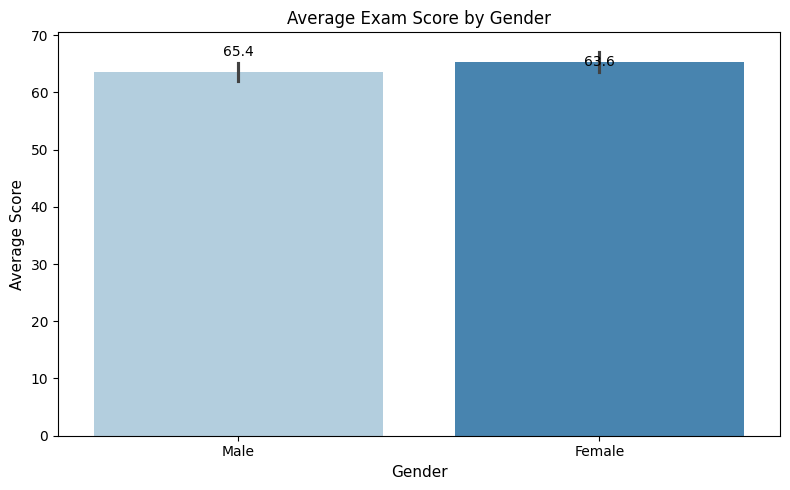

<ipython-input-18-2d8c3888f0f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Average', data=data, errorbar='se', palette=palettes[col])


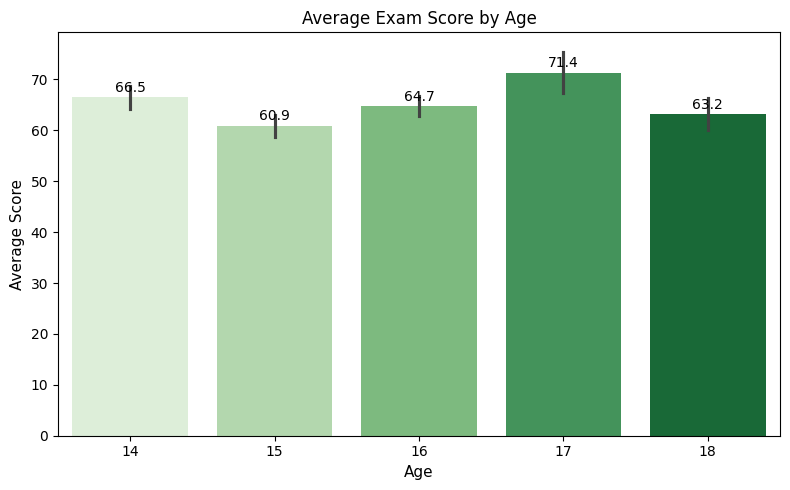

<ipython-input-18-2d8c3888f0f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Average', data=data, errorbar='se', palette=palettes[col])


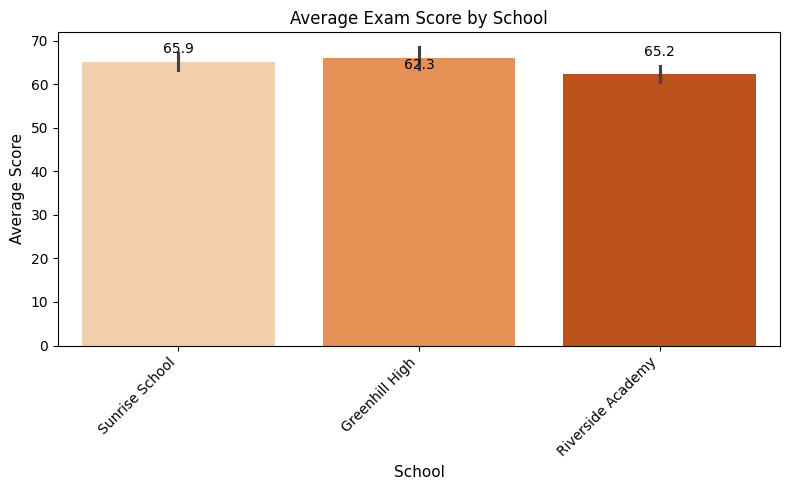

In [18]:
palettes = {'Gender': 'Blues', 'Age': 'Greens', 'School': 'Oranges'}
for col in group_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='Average', data=data, errorbar='se', palette=palettes[col])
    means = data.groupby(col)['Average'].mean()
    for i, mean in enumerate(means):
        plt.text(i, mean + 0.5, f'{mean:.1f}', ha='center', va='bottom', fontsize=10)
    plt.title(f'Average Exam Score by {col}', fontsize=12)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Average Score', fontsize=11)
    if col == 'School':
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'average_score_by_{col.lower()}.png', dpi=100)
    plt.show()

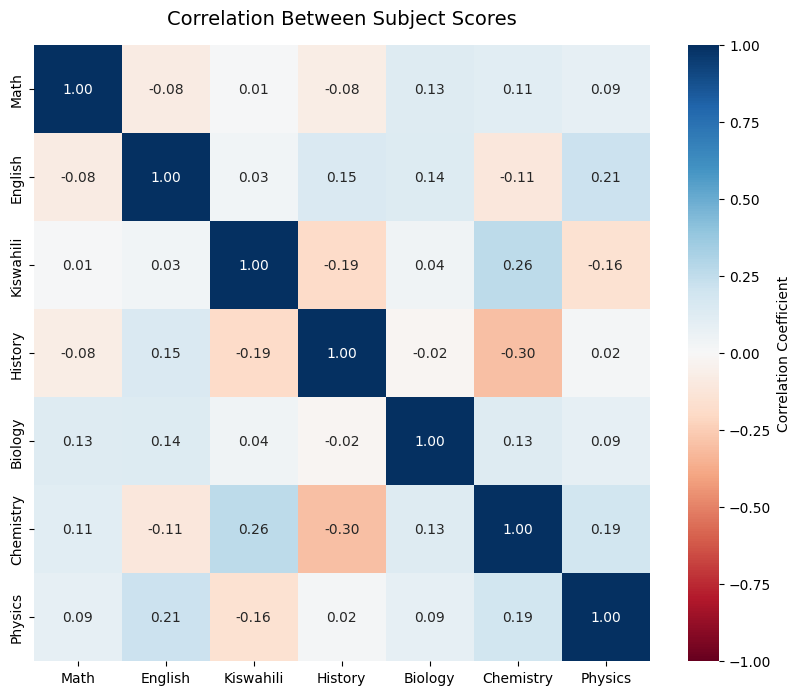

In [28]:
# Comfortable size for readability
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values
    cmap='RdBu',  # Red-blue diverging colormap for positive/negative correlations
    vmin=-1, vmax=1,  # Set scale to -1 to 1
    center=0,  # Center at 0 for clarity
    fmt='.2f',  # Round to 2 decimals
    square=True,  # Square cells for better visuals
    cbar_kws={'label': 'Correlation Coefficient'}  # Label colorbar
)

# Customize title
plt.title('Correlation Between Subject Scores', fontsize=14, pad=15)


# Save plot for portfolio
plt.savefig('correlation_heatmap.png', dpi=100, bbox_inches='tight')

plt.show()

<ipython-input-36-6b78ad2e7c91>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Passed', data=data, palette='Set2')


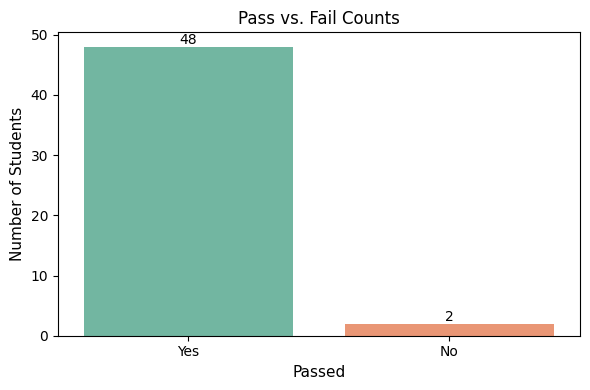

Pass/Fail Summary:
Passed
Yes    0.96
No     0.04
Name: proportion, dtype: float64


In [36]:
#Count plot for pass/fail
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Passed', data=data, palette='Set2')
plt.title('Pass vs. Fail Counts', fontsize=12)
plt.xlabel('Passed', fontsize=11)
plt.ylabel('Number of Students', fontsize=11)

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.4, p.get_height() + 0.5), ha='center')

plt.tight_layout()
plt.savefig('pass_fail_counts.png', dpi=100)
plt.show()

# Print numerical summary
print("Pass/Fail Summary:")
print(data['Passed'].value_counts(normalize=True).round(2))

Model Scores:
Logistic Regression:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Random Forest:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


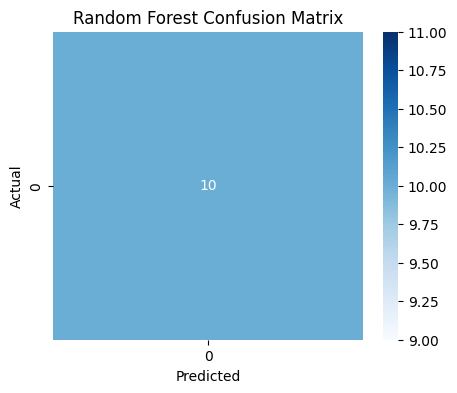

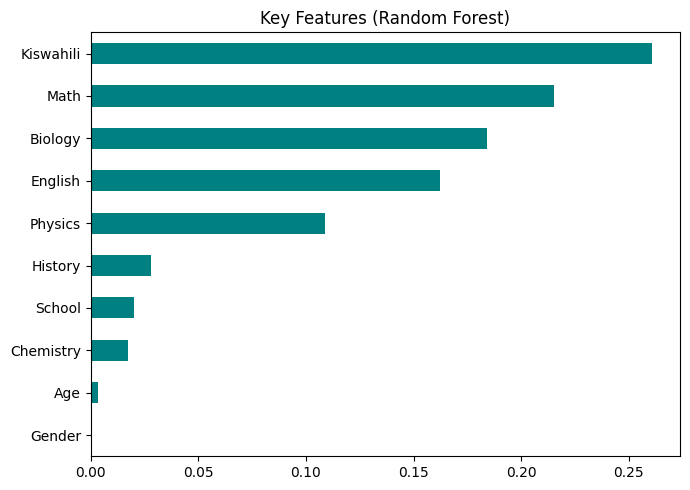

In [43]:
# Encode categorical variables
le = LabelEncoder()
for col in ['Gender', 'School', 'Passed']:
    data[col] = le.fit_transform(data[col])

X = data[subjects + ['Gender', 'Age', 'School']]
y = data['Passed']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model Magic: Predict Pass/Fail ---
# Train Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --- Quick Evaluation ---
print("Model Scores:")
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr, zero_division=0))
print("Random Forest:\n", classification_report(y_test, y_pred_rf, zero_division=0))

# --- Visualize Results ---
# Confusion Matrix for Random Forest
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('rf_confusion_matrix.png', dpi=100)
plt.show()

# Feature Importance
plt.figure(figsize=(7, 5))
pd.Series(rf.feature_importances_, index=X.columns).sort_values().plot(kind='barh', color='teal')
plt.title('Key Features (Random Forest)')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=100)
plt.show()




In [45]:
# Dynamic Insight: Class Imbalance
import pandas as np
data = pd.read_csv('highschool_exam_results.csv')
pass_rate = data['Passed'].value_counts(normalize=True)['Yes'] * 100
print(f"Insight: {pass_rate:.1f}% passed, highlighting class imbalance, like rare events in finance!")

Insight: 96.0% passed, highlighting class imbalance, like rare events in finance!


## 📊 Insights & Finance Connection

**Key Takeaways**:
- Predicted pass/fail with Random Forest, where Math & Physics scores shine as top predictors—think key financial indicators driving credit scores!
- Only 4% of students failed, showing class imbalance, a common hurdle in finance (e.g., rare loan defaults).

**Why It’s Quant-Ready**:
- **Data Prep**: Cleaned and encoded data, like prepping messy financial records.
- **Stats & Models**: Analyzed patterns and built classifiers, akin to forecasting market trends or risks.
- **Evaluation**: Assessed model reliability, ensuring robust predictions for real-world finance.

This project mirrors financial modeling, turning raw data into predictions for success! 🚀